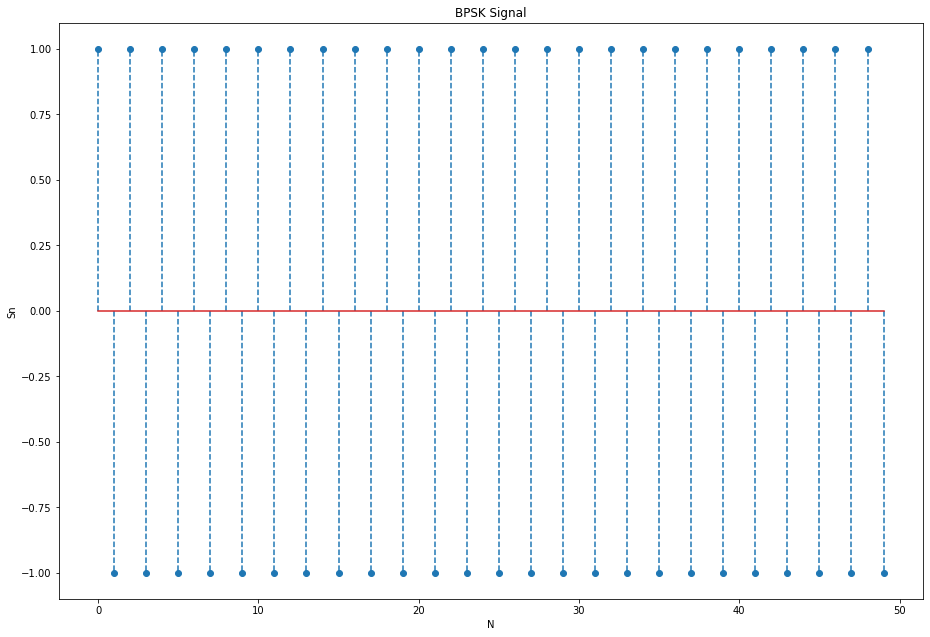

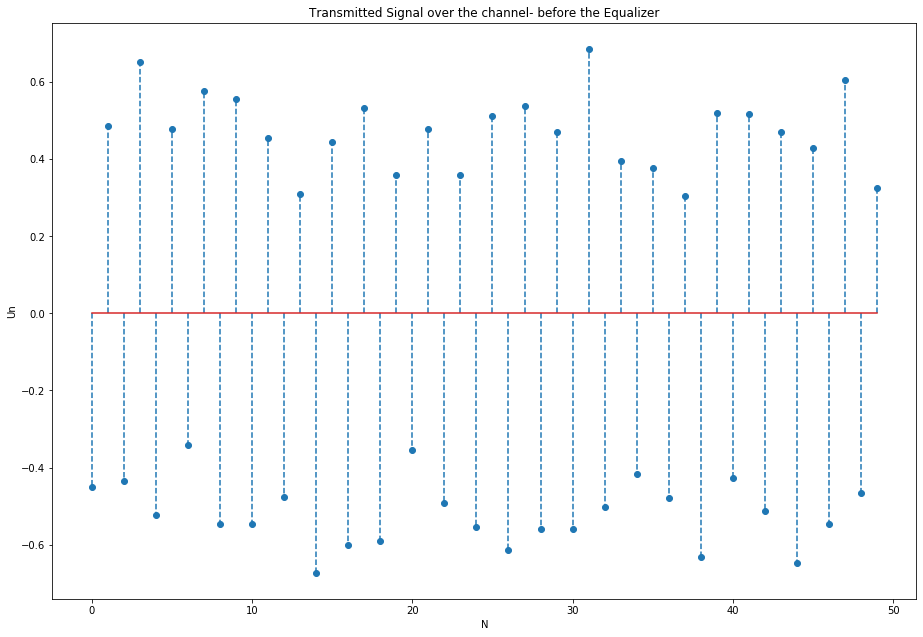

the Optimal value for W is:
[0.07336849 0.88034107 0.11202802]
No Corrupted Symbols


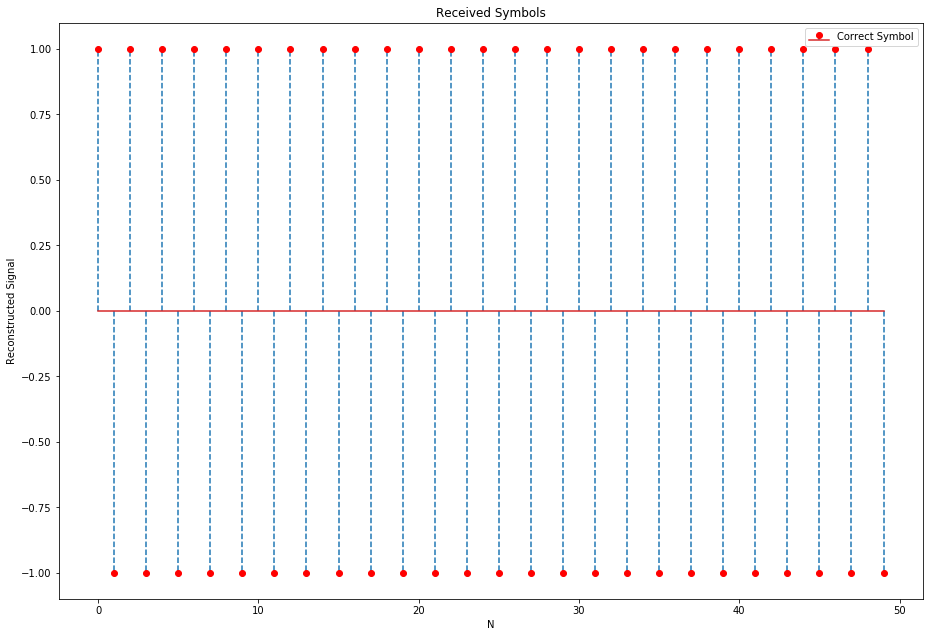

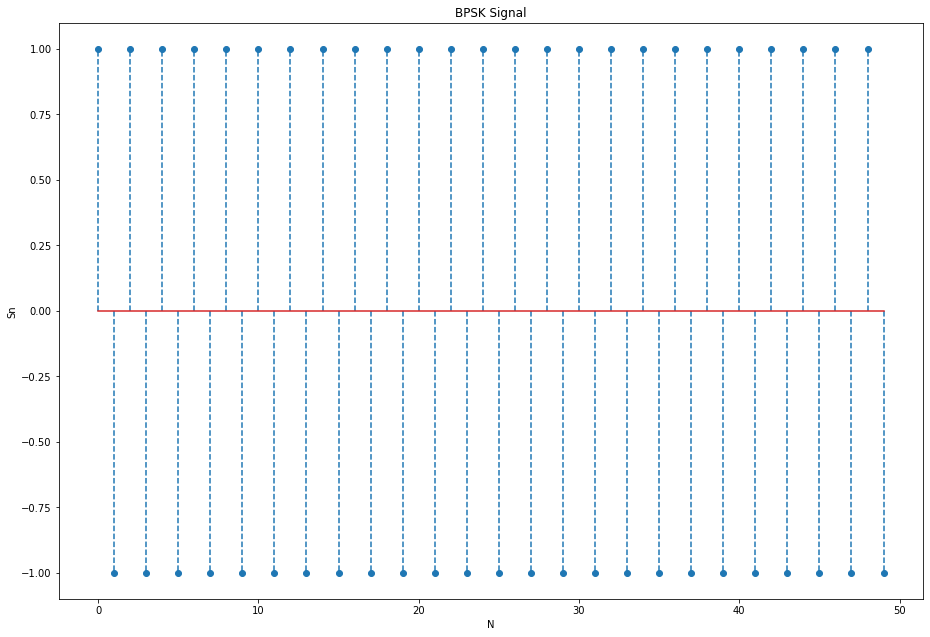

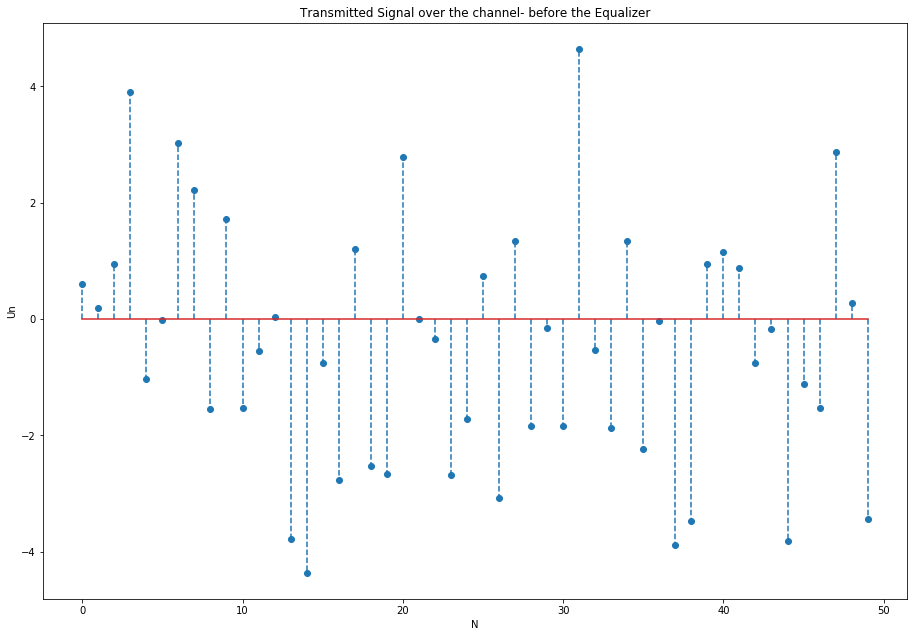

the Optimal value for W is:
[-0.05242945  0.00439114 -0.04462301]


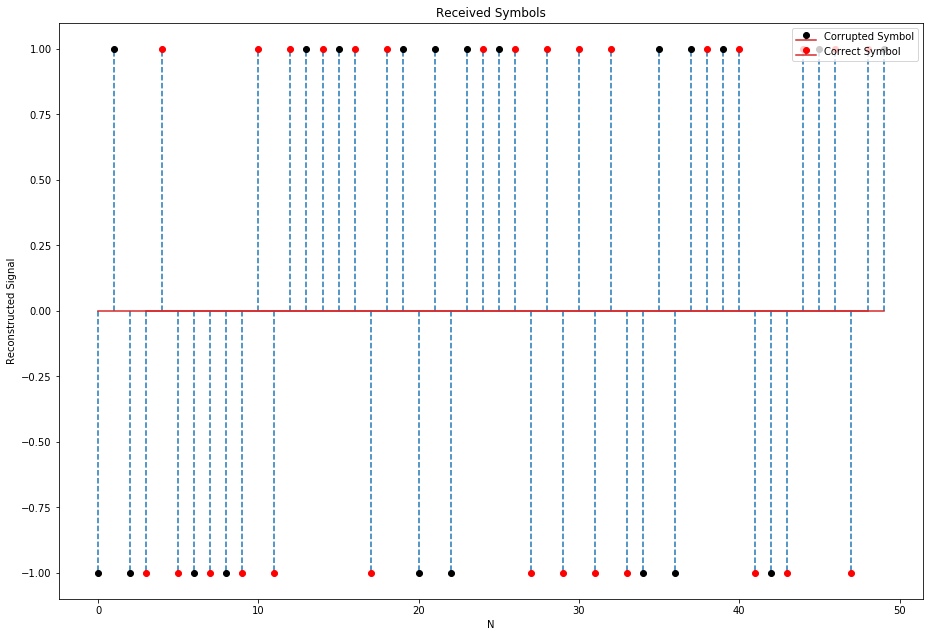

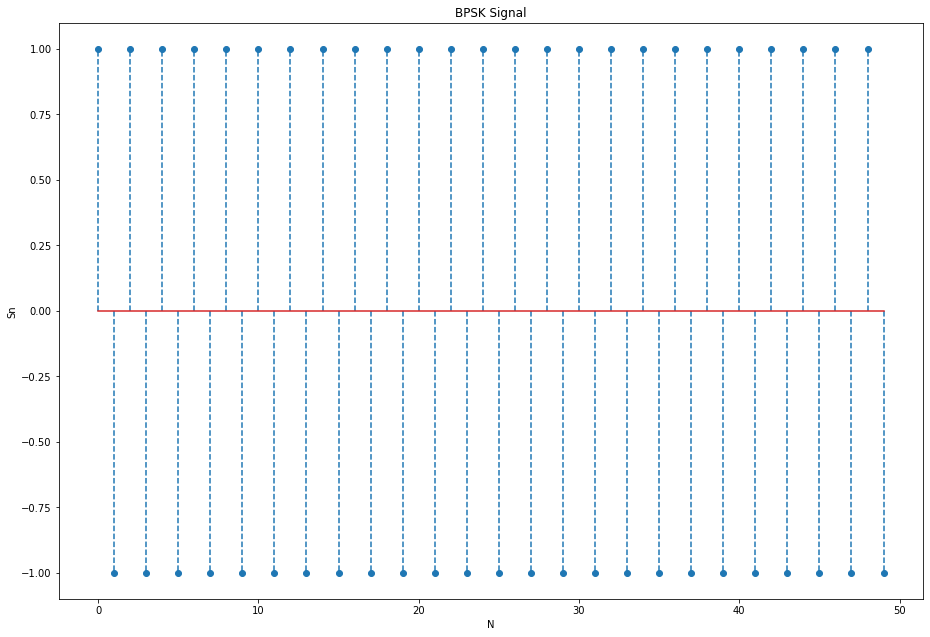

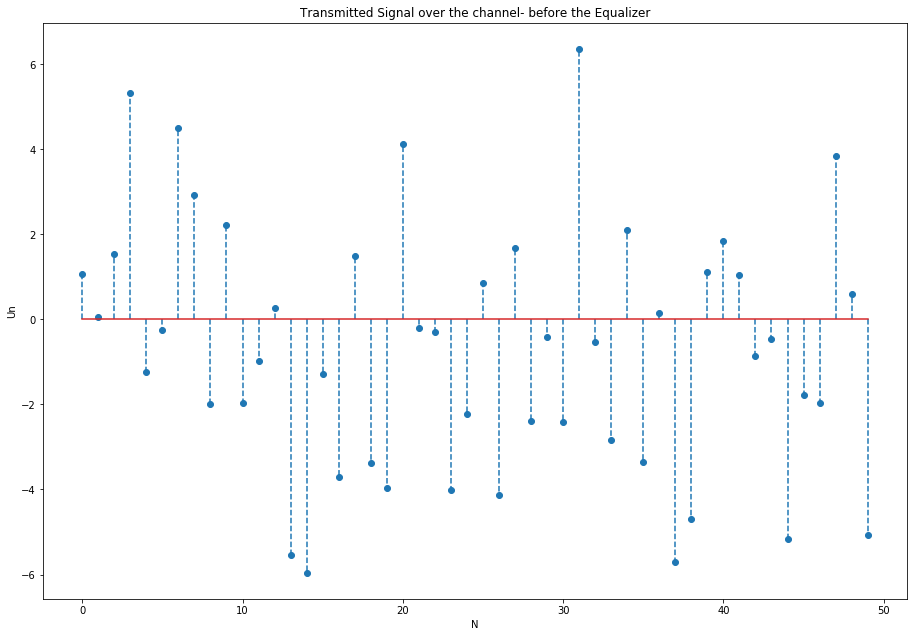

the Optimal value for W is:
[-0.0284279  -0.00333441 -0.0263382 ]


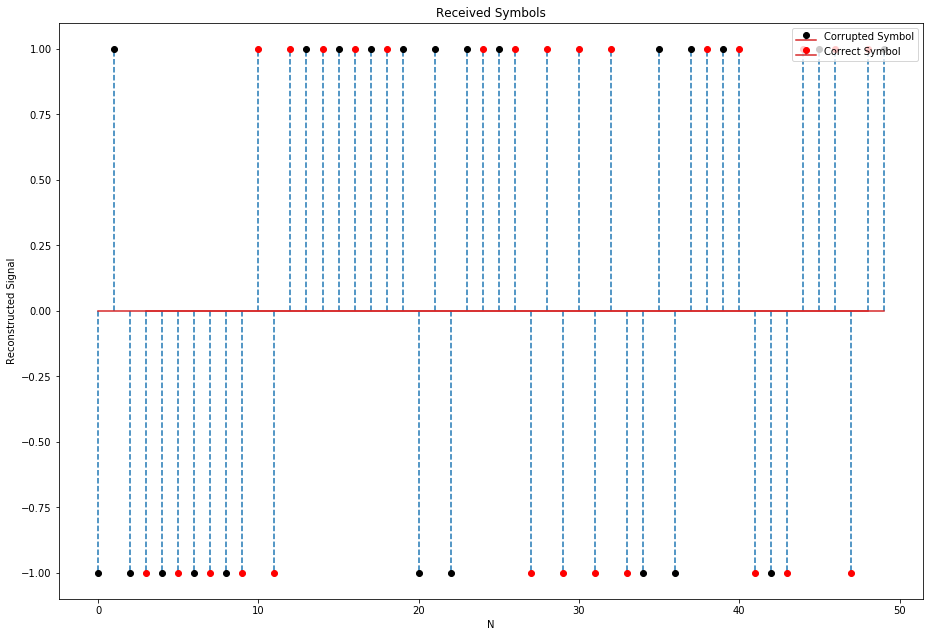

()

In [59]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import linalg

def Task1(var):
    np.random.seed(42)  
    N=50
    s=np.ones((N,1))
    Sn=[None]*len(s)
    for i in range(len(s)):
        Sn[i]=s[i]*((-1.0)**i)
    # Plotting

    fig=plt.figure()
    axes = fig.add_axes([0, 0, 2, 2])
    plt.xlabel('N')
    plt.ylabel('Sn')
    plt.title('BPSK Signal')
    axes.stem(Sn,use_line_collection=True,linefmt='--')
    plt.show()
    
    Sn = np.array(Sn).ravel()
    Sn_1 = np.hstack((Sn[N-1],Sn[ :N-1]))
    var_eta = var
    eta     = np.sqrt(var_eta) * np.random.randn(N,1)
    U = 0.5* (Sn.reshape(N,1))+(Sn_1.reshape(N,1))+ eta

# Plotting

    fig1=plt.figure()
    axes1 = fig1.add_axes([0, 0, 2, 2])
    plt.xlabel('N')
    plt.ylabel('Un')
    plt.title('Transmitted Signal over the channel- before the Equalizer')
    axes1.stem(U,use_line_collection=True,linefmt='--')
    plt.show()


## Quesion III: finding the optimal value for W using normal equations

    U0 = np.array(U).ravel()
    Un_1 = np.hstack((U0[N-1],U0[ :N-1]))
    Un_2 = np.hstack((U0[N-2], U0[N-1], U0[:N-2] ))
    Un = np.concatenate((U0, Un_1, Un_2), axis=0)
    Un=Un.reshape(N,3)
    W = np.dot(np.linalg.inv(np.dot(Un.T,Un)),Un.T).dot(Sn)
    print('the Optimal value for W is:')
    print(W) 
    
## Question iv: 

    Sn_new =np.sign ( W[0]*U0 + W[1]*Un_1 + W[2]*Un_2)

    Sn_old =Sn

# creating a list for the correctly reconstructed symbols
    label1=[]
    x=[]

# creating a list for the faulty symbols
    label2=[]
    y=[]
    z=[]
    for i in range(N):
        if Sn_new[i] != Sn_old[i]:
            label2.append(i)
            y.append(Sn_old[i])
            z.append(Sn_new[i])
        else:
            label1.append(i)
            x.append(Sn_new[i])
            
    fig2 = plt.figure()
    axes2 = fig2.add_axes([0, 0, 2, 2])
    plt.title('Received Symbols')
    plt.xlabel('N')
    plt.ylabel('Reconstructed Signal')
    if y==[] or z==[]:
        print('No Corrupted Symbols')
    else:
        #axes2.stem(label2,y,markerfmt='ko', use_line_collection=True,label='Original Symbol',linefmt='--')
        axes2.stem(label2,z,markerfmt='ko', use_line_collection=True,label='Corrupted Symbol',linefmt='--')
        plt.legend(loc=1)
    if x==[]:
        print('All Received Symbols are corrupted')
    else:
        axes2.stem(label1,x, markerfmt='ro', use_line_collection=True,label='Correct Symbol',linefmt='--')
        plt.legend(loc=1)

    plt.show()
    
    return()

# Question(V):

# Performing Problem 1 with different values of noise variance
Task1(0.01) 
Task1(5)
Task1(10)

# Comment
# the noise variance affects the received data reliability; As increasing the variance, results in incresing the number of corrupted symbols
    

